## Housing Price Prediction

In this  project , we  applied various data models (Linear Regression models, Neural Network etc) to analyze and compare our housing(Ames housing) dataset.We also tried to find out the best features to predict housing prices. This would give us an opportunity to find out different characteristics of various data models and also use our project as a comparison tool of data models. Our tool can be implemented against any dataset and see what features can be used to get good predictions in a dataset.

First, we clean our dataset .

Then , we apply various regression models to compare the results.


In [1]:
import pandas

In [2]:
AmesHousing = pandas.read_excel('../data/AmesHousing.xls')

In [3]:
AmesHousing.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [4]:
AmesHousing.shape

(2930, 82)

Changes directory to load Python Files 

In [5]:
cd ..

D:\UofMemphis\Fall-18\COMP6993\DSP-COMP6993


In [6]:
from libpy import NS_dp

Call the function to clean, standard data, required for better regression model performance

In [7]:
df = NS_dp.clean_Ames_Housing(AmesHousing)

E:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [8]:
# df.head(10)

In [9]:
df.shape

(2678, 213)

In [10]:
# for column in df.columns:
#     print( column )

In [11]:
from libpy import FS

Selects Features, X and y, 

    - divide between train and test set with "test_size" default test_size=0.4
    - finds best "k" features default k=10

In [12]:
X_train, y_train, X_test, y_test = FS.feature_select(df, test_size=0.4, k=50)

In [13]:
X_train.sample(10)

,3Ssn Porch,Mo Sold,MS SubClass,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),Street_Grvl,Land Contour_HLS,Lot Config_FR2,Lot Config_FR3,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Condition_Alloca,Sale Condition_Partial,Lot Shape,Land Slope,Bsmt Qual,BsmtFin Type 1,Heating QC
386,0,4,160,0,0,0,0,0,0,0,...,0,0,0,0,0,3.0,0.0,2.0,0.0,4.0
213,0,4,40,0,0,0,0,0,0,0,...,0,0,0,0,0,3.0,2.0,2.0,2.0,4.0
1309,0,8,20,0,0,0,0,0,0,0,...,0,0,0,0,0,3.0,1.0,2.0,2.0,0.0
2602,0,10,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,4.0,4.0,0.0
1726,0,6,80,0,0,0,0,0,0,0,...,0,0,0,0,0,3.0,0.0,4.0,2.0,0.0
2215,0,10,120,0,0,0,0,0,0,0,...,0,0,0,0,0,3.0,0.0,2.0,5.0,0.0
634,0,4,20,0,0,0,0,1,0,0,...,0,0,0,0,0,0.0,1.0,2.0,5.0,1.0
631,0,4,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,4.0,4.0,2.0
1991,0,5,20,0,0,0,0,1,0,0,...,0,0,0,0,0,3.0,0.0,4.0,4.0,4.0
1640,0,4,20,0,0,0,0,0,0,0,...,0,0,0,0,0,3.0,0.0,2.0,2.0,0.0


In [14]:
# for column in X_train.columns:
#     print( column )

In [15]:
from libpy import CV

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neural_network import MLPRegressor

from sklearn import linear_model

from sklearn.svm import SVR

In [17]:
# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=100, max_features=None),
    
    "Random Forest": RandomForestRegressor(random_state=0, n_estimators=100, max_features=None),
# #     "Multi Output" : MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=30, random_state=0)),
    
# #     "Neural Network" : MLPRegressor( early_stopping=True, warm_start=False),
    
    "K-nn": KNeighborsRegressor(),
    
    "Linear regression": linear_model.LinearRegression(),
    
    "Ridge CV": linear_model.RidgeCV(),
# #     "Ridge" : linear_model.Ridge (alpha = .5),
    
#     "Lasso" : linear_model.Lasso(alpha = 0.15, tol=0.001),
    "Lasso CV" : linear_model.LassoCV(cv=5),
    
    "svr_rbf" : SVR(kernel='rbf', C=1e3, gamma=0.1),
    "svr_lin" : SVR(kernel='linear', C=1e3), 
    "svr_poly" : SVR(kernel='poly', gamma='auto', C=1e3, degree=2)
}

Here we run all the Regression model, train them, validate them at the same time with Training set. 
We show number of errors in graph for testing set. It's a basic run to identify interesting Regressor, works better for our dataset

Extra trees  :  ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features=None, max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)
... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...  ... validate_model complete
score:  0.5612843181525734


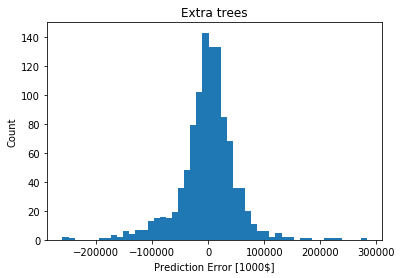

Random Forest  :  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...  ... validate_model complete
score:  0.6339863874291015


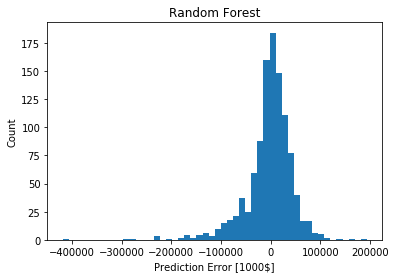

K-nn  :  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')
... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...  ... validate_model complete
score:  0.5334247003027907


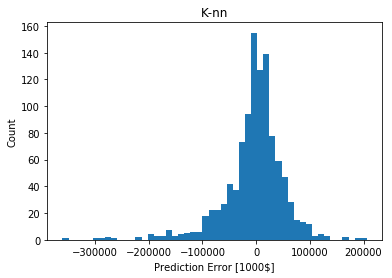

Linear regression  :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...  ... validate_model complete
score:  0.6231968521189473


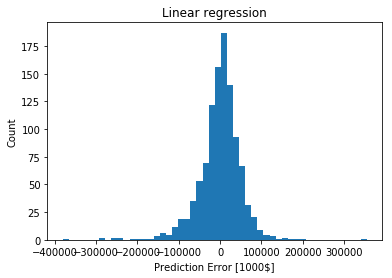

Ridge CV  :  RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)
... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...  ... validate_model complete
score:  0.6347361997204198


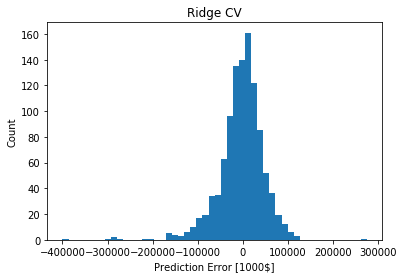

Lasso CV  :  LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)
... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...  ... validate_model complete
score:  0.627042651012145


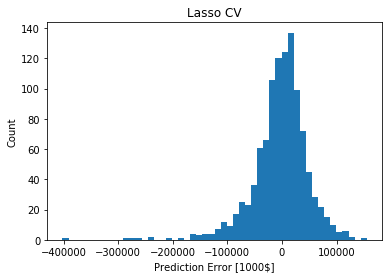

svr_rbf  :  SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...  ... validate_model complete
score:  0.06812533143535317


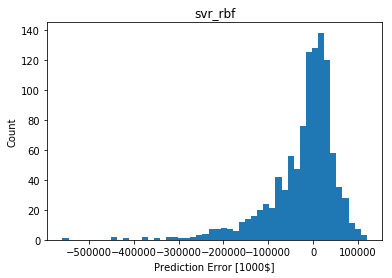

svr_lin  :  SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)
... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...  ... validate_model complete
score:  0.5356481738738658


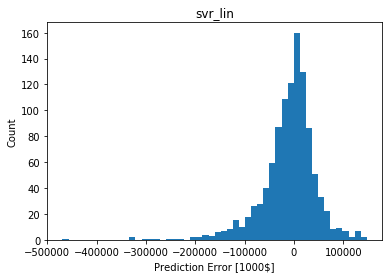

svr_poly  :  SVR(C=1000.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...  ... validate_model complete
score:  0.4218575756501034


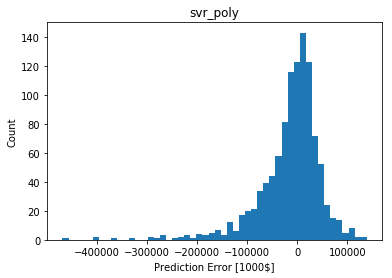

In [18]:
ESTIMATORS, predictions = CV.grade_model(ESTIMATORS, X_train, y_train, X_test, y_test)

Based on previously created model, here we show their prediction in a Data Fram, 
At the same time, we plot the model, to see how much it looks like a regression

In [22]:
bf = CV.pack_data(predictions)
bf.sample(20)

,y_test,Extra trees_y_pred,Random Forest_y_pred,K-nn_y_pred,Linear regression_y_pred,Ridge CV_y_pred,Lasso CV_y_pred,svr_rbf_y_pred,svr_lin_y_pred,svr_poly_y_pred
996,200000,-59453.70,-20163.500000,-52800.0,-53657.770282,-51066.319625,-47154.588176,26507.230039,-41367.123039,-47844.364072
33,97500,-7500.00,-16656.000000,-18800.0,-14943.512177,-8046.012264,-20114.380409,-60578.092273,-18978.734141,-38122.880349
872,112000,58487.27,3991.000000,-17560.0,-46397.624242,-52902.563034,-69862.179867,-45142.273756,-76505.381098,-64477.611924
522,128500,6876.00,-2251.333333,-7800.0,-20010.775737,-15264.368250,-15683.411804,-27176.830657,-6550.765744,-23221.259434
549,277000,66610.68,80907.166667,101780.0,86953.295436,92382.391459,89747.328605,118645.763470,79075.229496,83961.827422
292,324000,80960.20,85038.138095,58660.0,-36109.654116,50379.265597,86725.219461,154580.545377,123279.165099,108099.973646
584,220000,8000.00,7159.866667,-35550.0,22634.159162,23651.733443,21339.652005,27271.457464,14357.034128,28671.759846
253,210000,78419.34,26927.090000,77600.0,33210.358599,30773.482487,24968.580199,49305.088233,26743.643888,32766.215779
955,124000,11085.00,-4579.450000,-33456.6,-44849.881953,-37986.027089,-37578.989950,-37374.844261,-42585.515964,-47827.424907
507,248328,14960.10,-8367.830000,43514.2,15408.670434,-6906.037236,6696.974726,79934.066684,29989.920365,59199.035849


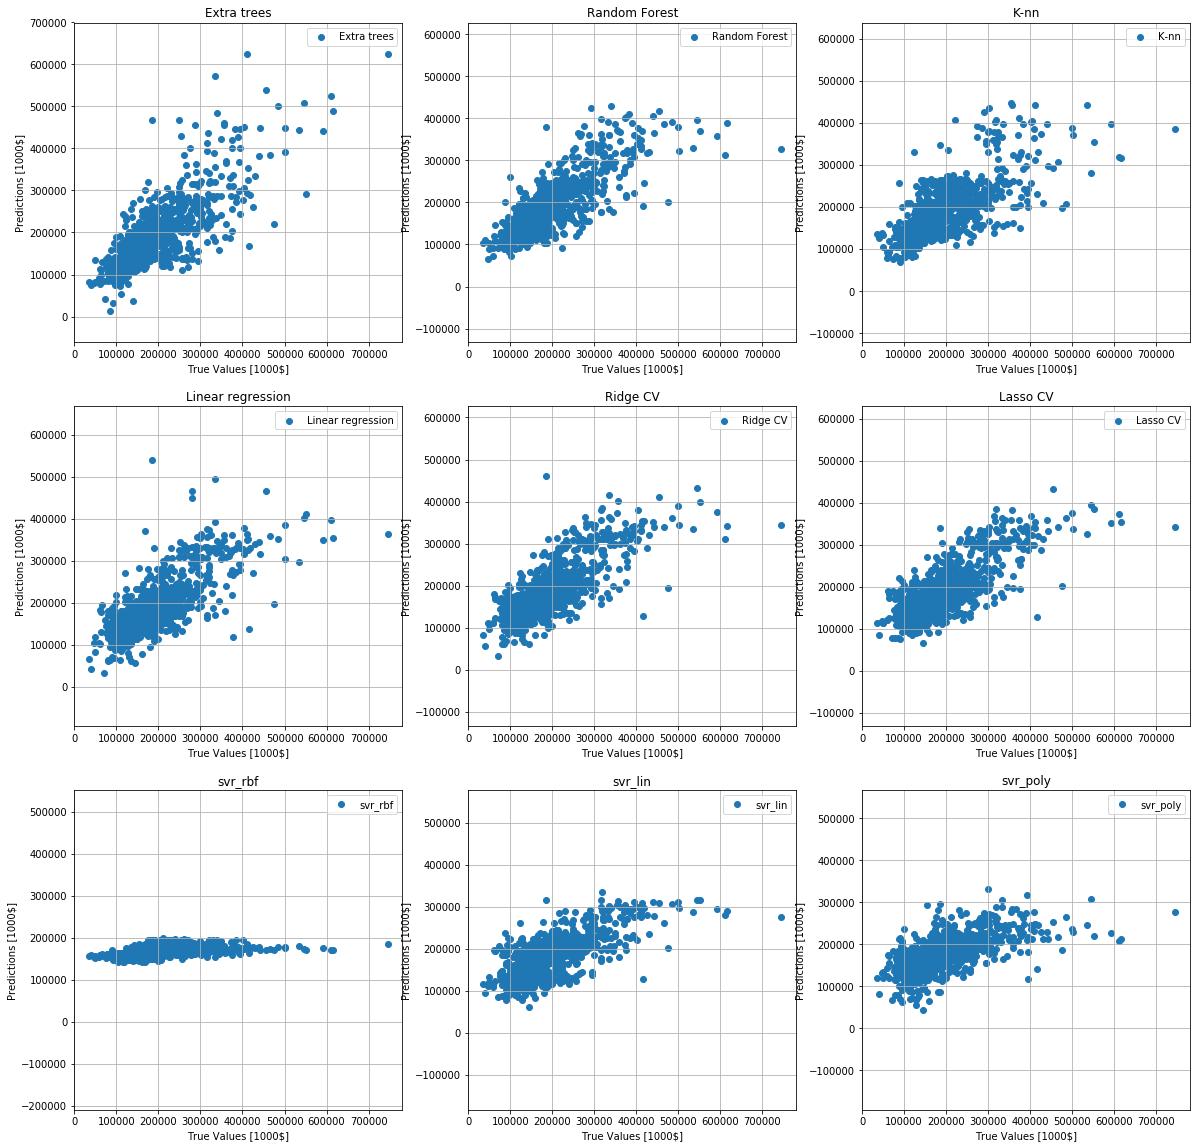

In [23]:
CV.plot_predict(predictions)

Based on our test run, we takes cross validation score to find the intersting regressor
    - Random Forest  : 0.6080293921099941
    - Linear regression  :  0.5458249257494681
    - Ridge CV  :  0.5687157473236889
    - Lasso CV  :  0.5542356922189126

So we are trying to find best k upto 210 features with "Random Forest" with cross-validation score of 90% data

... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...  ... validate_model complete
5  score:  0.32542334804143835
... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...  ... validate_model complete
10  score:  0.33183340374020687
... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...

... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...  ... validate_model complete
175  score:  0.8289616352716203
... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...  ... validate_model complete
180  score:  0.8306339684901574
... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ..

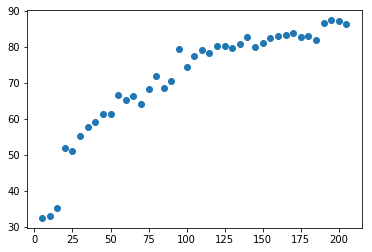

In [24]:
Ks= []
Scores = []
for i in range(5, 211, 5):
    RFR = RandomForestRegressor(random_state=0, n_estimators=100, max_features=None)
    
    X_train, y_train, X_test, y_test = FS.feature_select(df, test_size=0.1, k=i)
    
    score, RFR = CV.validate_model( RFR, X_train, y_train )
    
    print( i, " score: ", score)
    
    Ks.append(i)
    Scores.append(score*100)
    
CV.plot_any( Ks, Scores )    

With left 10% we check the score of model built with most features

In [25]:
RFR.score(X_test, y_test)

0.8797579562089283

As we found with increase of features and near 90% accuracy with most features. We have lot's of scope of improvement. We will try different technique to Standardize data, at the same time try to find a way to increase performance with better fine tuning.